# The Model Project (BCG group) 
##  OLG Model

In [1]:
#importing the necessary packages 

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm

import matplotlib.pyplot as plt
import numpy as np

**General assumptions:**
1. Closed economy with no government and no unemployment
2. One final good is consumed or invested to produce additional output
3. All markets are competitive
4. Firms and households have perfect foresight about all economic variables

**(i) Household's problem**

It tries to maximize its utility, given by the function: 

\\[ \max_{c_{1,t},c_{2,t+1}}U = ln{(c_{1,t})} + \beta ln{(c_{2,t+1})}\\]

\\[ \text{ s.t. } \\]

\\[z_{t+1} = w_t - c_{1,t} \\]

\\[c_{2,t+1} = z_{t+1}(1 + r_{t+1})\\]

where:

1. $c_{1,t}$ consumption at period $t$
* $c_{2,t+1}$ consumption at period $t+1$
* $w_t$ wage
* $r_{t+1}$ interest rate 
* $\beta$ is the subjective discount factor, 0 < $\beta$ < 1
* $z_{t+1}$ is the financial assets held at the beginning of period $t+1$ by the households born at time $t$

**Note:** It is assumed that each household borns and dies with no assets $\alpha_{t}$ = 0, $\alpha_{t+2}$ = 0 

In [2]:
# Activating pretty printing
sm.init_printing(use_unicode=True)

In [3]:
# Defining symbolically the necessary variables
c1 = sm.symbols('c_1_t')
c2 = sm.symbols('c_2_t+1')
beta = sm.symbols('beta')
#z0 =sm.symbols('z_t')
#z2 = sm.symbols ('z_t+2')
z = sm.symbols('z_t+1') 
w = sm.symbols('w_t') # wage
r1 = sm.symbols('r_t+1')
u = sm.symbols('U_t') #Utility
L = sm.symbols('L') #Langrange
omega = sm.symbols('omega') #The Langrangian multiplier

# Checking that our variables have the proper format
c1,c2, beta, w, z, r1, L, omega

In [4]:
# Defining the utility function
def utility(c1, c2, beta):
    return (sm.log(c1) + beta*sm.log(c2))

Calculating the **Lifetime Budget Constraint** that will be used at the Langranian

In [5]:
#Defining the two budget constraints symbolically
budget_constraint_1 = sm.Eq(z, w - c1)
budget_constraint_2 = sm.Eq(c2, z*(1+r1))

budget_constraint_1, budget_constraint_2

Solve in **three steps**:

1. **Solve** $z_{t+1}$ from the budget constraint 1
2. **Substitute** in budget constraint 2
3. **Solve** for $w_t$

**Step 1: Solve** $z_{t+1}$ from the budget constraint 1

In [6]:
z_from_constraint = sm.solve(budget_constraint_1, z)
z_from_constraint

**Step 2: Substitute** in budget constraint 2

In [7]:
z_subs_constraint = budget_constraint_2.subs(z, z_from_constraint[0])
z_subs_constraint

**Step 3: Solve** for $w_t$

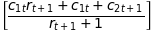

In [8]:
lifetime_budget_constraint = sm.solve(z_subs_constraint, w)
lifetime_budget_constraint

So, the households try to maximize their utility under the **Lifetime Budget Constraint**

\\[ \max_{c_{1,t},c_{2,t+1}}U = ln{(c_{1,t})} + \beta ln{(c_{2,t+1})}\\]

\\[ \text{ s.t. } \\]

\\[c_{1,t} + \frac {c_{2,t+1}}{(1 + r_{t+1})} = w_{t}\\]

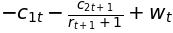

In [9]:
# Defining the Lifetime Budget Constraint symbolically
budget_constraint = w - c1 - c2/(1+r1)
budget_constraint

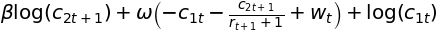

In [10]:
#Constructing the Langrangian
Langrangian = utility(c1, c2, beta) + omega * budget_constraint
Langrangian

Solve in **six steps**:

1. **Calculate** the two FOCs wrt. $c_{1,t}$ and $c_{2,t+1}$
2. **Isolate** the first FOC for $\omega$
3. **Substitute** in the second FOC
4. **Isolate** the second FOC for $c_{1,t}$
5. **Substitute** into the Lifetime Budget Constraint
6. **Solve** for $c_{2,t+1}$ to find the consumption in period 2
7. **Substitute** $c_{2,t+1}$ in Lifetime Budget Constraint 
8. **Solve** for $c_{1,t}$ to find the consumption in period 1
9. **Substitute** in the first budget constraint ($z_{t+1} = w_t - c_{1,t}$)
10. **Solve** for $z_{t+1}$ to find the assets held by the household at period 2

**Step 1: Calculate** the two FOCs wrt. $c_{1,t}$ and $c_{2,t+1}$

In [11]:
foc1 = sm.diff(Langrangian, c1)
foc2 = sm.diff(Langrangian, c2)

foc1, foc2

**Step 2: Isolate** the first FOC for $\omega$

In [12]:
foc_1 = sm.solve(foc1, omega)
foc_1

**Step 3: Substitute** in the second FOC

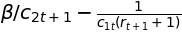

In [13]:
foc_2 = foc2.subs(omega, foc_1[0])
foc_2

**Step 4: Isolate** the second FOC for $c_{1,t}$

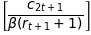

In [14]:
AB = sm.solve(foc_2, c1)
AB

**Step 5: Substitute** into the Lifetime Budget Constraint

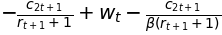

In [15]:
ABC = budget_constraint.subs(c1, AB[0])
ABC

**Step 6: Solve** for $c_{2,t+1}$ to find the consumption in period 2

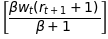

In [16]:
consumption_2 = sm.solve(ABC,c2)
consumption_2

**Step 7: Substitute** $c_{2,t+1}$ in Lifetime Budget Constraint

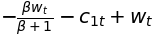

In [17]:
ABCD = budget_constraint.subs(c2, consumption_2[0])
ABCD

**Step 8: Solve** for $c_{1,t}$ to find the consumption in period 1 

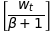

In [18]:
consumption_1 = sm.solve(ABCD, c1)
consumption_1

**Step 9: Substitute** in the first budget constraint ($z_{t+1} = w_t - c_{1,t}$)

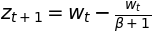

In [19]:
ABCDE = budget_constraint_1.subs(c1, consumption_1[0])
ABCDE

**Step 10: Solve** for $z_{t+1}$ to find the assets held by the household at period 2

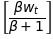

In [20]:
Assets = sm.solve(ABCDE, z)
Assets

**Conclusion:** After solving the Household's problem we found that:

\\[c_{1,t} = \frac {w_t}{1+\beta}\\],
\\[c_{2,t+1} = (1+r_{t+1}) \frac {1}{1+(\frac{1}{\beta})} w_{t}\\]
\\[z_{t+1} = \frac {1}{1+(\frac{1}{\beta})} w_{t}\\]

**(ii) Firm's Problem**

The **production function** is a **Cobb-Douglas** with the format of:

\\[ Y_{t} = K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\\]

where:

1. $Y_t = F(K_t,A_tL_t)$ is the produced output  

* $K_t$ is the capital

* $L_t$ is the labor force, growing exogenously at rate $n$,\\[L_{t+1} = {(1-n)} L_{t}\\]

* $A_t$ is the index of technological progress, growing exogenously at rate of $g$,\\[A_{t+1} = {(1-g)} A_{t}\\] 

* $a$ is the share of physical capital and 0 < $a$ < 1

**Note 1:** It is assumed that capital ($K_{t}$) depreciates at rate $\delta$ per period, too. 

**Note 2:** It is more convenient to write $Y_{t}$ and $K_{t}$ per effective worker, so \\[y_{t} = \frac {Y_{t}}{A_{t}L_{t}}\\] and \\[k_{t} = \frac {K_{t}}{A_{t}L_{t}}\\]

**Note 3:** The firm is trying to maximize its profits under perfect competition and no-adjustment costs. So, in the equillibrium firms want to equalise both **Marginal Products $(MPK_t, MPL_t)$** with their rental rates **($r_{t} + \delta$, $w_{t}$)**, respectively. 

**FOC's** of the production fuction

\\[ MPK_{t} : {\alpha}k_{t}^{\alpha-1} = r_{t}+{\delta}\\]

\\[ MPL_{t} : {1-\alpha}A_{t}k_{t}^{\alpha} = w_{t}\\]

In [21]:
# Defining symbolically the necessary variables
alpha = sm.symbols('alpha') # share of physical capital
k = sm.symbols ('k_t') 
r = sm.symbols('r_t') # interest rate
delta = sm.symbols('delta') # depreciation rate of capital per period
A = sm.symbols('A_t') # technological index
A1 = sm.symbols('A_{t+1}')
g = sm.symbols ('g') #rate of technological growth
L0 = sm.symbols('L_{t}')
L1 = sm.symbols('L_{t+1}')
n = sm.symbols('n') #growth of labor force

# Checking that our variables have the proper format
alpha, k, r, delta, A, A1, g, L0, L1, n

First we define the equations for the **technological** and the **labor's force** growth and solve them wrt to period t for later use: 

In [22]:
tech = sm.Eq((1+g)*A, A1)
labor = sm.Eq((1+n)*L0, L1)

tech, labor

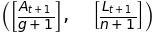

In [23]:
tech0 = sm.solve(tech, A)
labor0 = sm.solve(labor, L0)

tech0, labor0

Then we define the two FOCs from the firms maximization and equalize them with their respective rental rates

In [24]:
# Defining the two FOC's and setting them equal with their rental rates
MPK = sm.Eq((alpha*k**(alpha-1)), r+delta)
MPL = sm.Eq (((1-alpha)*A*k**alpha), w)

MPK, MPL

**Note:** We will solve the MPL wrt. to w, for later use

In [25]:
Wage = sm.solve(MPL, w)
Wage

**Conclusion:** From the firm's maximization problem we calculated the wage: 

\\[ w_{t} = A_{t} (\frac{\delta + r_{t}}{\alpha})^\frac{1}{\alpha -1} {(1-\alpha)}\\]

**(iii) Aggregation**

**Note:** the crucial aggregation is the one of physical capital , which we do it at time t+1 just for convience.


In [26]:
Ks = sm.symbols('K_{t+1}^{s}') #aggregate supply of physical capital at period t+1
Kd = sm.symbols('K_{t+1}^{s}')#aggregate demand of physical capital at period t+1
K = sm.symbols('K_{t+1}')
g1 = sm.symbols('g^{*}')
k1 = sm.symbols('k_{t+1}')

# Checking that our variables have the proper format
Ks, Kd, K, g1, k1

Solve in **seven steps**:

1. **Define** the capital supply $K_{t+1}^{s}$
2. **Substitute** for $z_{t+1}$ as calculated in the Household's problem
3. **Substitute** for $w_{t}$ as calculated in the Firm's problem
4. **Substitute** $A_{t}$ with $A_{t+1}$
5. **Substitute** $L_{t}$ with $L_{t+1}$
6. **Substitute** $(1+n)(1+g)$ with $g^{*}$
7. **Equalize** $K_{t+1}^{s} = K_{t+1}^{d} = K_{t+1}$

**Step 1: Define** the capital supply $K_{t+1}^{s}$

In [27]:
capital_supply = sm.Eq(L0*z ,Ks)
capital_supply

**Step 2: Substitute** for $z_{t+1}$ as calculated in the Household's problem

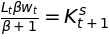

In [28]:
H = capital_supply.subs(z, Assets[0])
H

**Note:** the wage ($w_{t}$) must be compatible with the demand by firms at period t. So, 


\\[ K_{t+1}^{s} = K_{t+1}^{d} = K_{t+1}\\]

**Step 3: Substitute** for $w_{t}$ as calculated in the Firm's problem

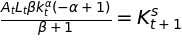

In [29]:
I = H.subs(w, Wage[0])
I

**Step 4: Substitute** $A_{t}$ with $A_{t+1}$

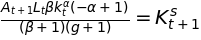

In [30]:
J = I.subs(A, tech0[0])
J

**Step 5: Substitute** $L_{t}$ with $L_{t+1}$

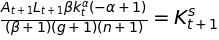

In [31]:
M = J.subs(L0, labor0[0])
M

**Step 6: Substitute** $(1+n)(1+g)$ with $(1+g^{*})$

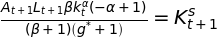

In [32]:
N = M.subs(((1+g)*(1+n)), (g1+1))
N

**Step 7: Equalize** $K_{t+1}^{s} = K_{t+1}^{d} = K_{t+1}$

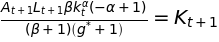

In [33]:
P = N.subs(Ks, K)
P

If we divide both sides of the equation with $A_{t+1}L_{t+1}$ then we will obtain the **Key Transition Equation:**

\\[ k_{t+1} = \frac {(1-\alpha)}{(1+g^{*})(1+ \frac{1}{\beta})} k_{t}^\alpha\\]

where 

\\[ (1+g^{*}) = (1+g)(1+n)\\]

and $g^{*}$ denotes the per period growth rate of effective workers (AL)

In [42]:
g1 = lambda n, g: (1+g)*(1+n)-1
solution = lambda k, alpha = 0.4 , g = 0.01, n = 0.06, beta = 0.8: (1-alpha)*k**alpha / ((1+g1(n,g))*(1+1/beta))
y = lambda x: x # this will be used to plot a 45o degree line at the first plot

In [43]:
k_values = np.linspace(0, 0.2, 10000)
x = np.linspace(0, 0.2, 10000)
solution(k_values)

array([0.        , 0.00328678, 0.00433693, ..., 0.13083343, 0.13083867,
       0.1308439 ])

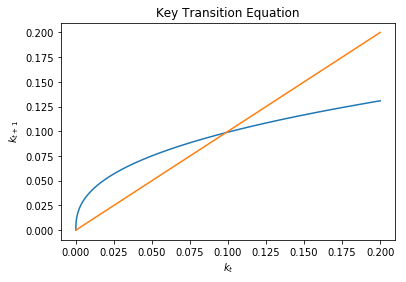

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(k_values, solution(k_values))
ax.plot(x, y(x))

plt.xlabel('$k_{t}$')
plt.ylabel('$k_{t+1}$')
plt.title('Key Transition Equation')



plt.show()

**Conclusion:**

**(iv) Steady State**

The **Key Transition Equation**  can describe the evolution of the capital per effective worker over two consecutive periods, too. If we are interested in the analysis of steady states, then  $k_{t+1} = k_{t} = k^{*}$ and it becomes

\\[ k^{*} = \frac{(1-\alpha)}{(1+g^{*})(1+ \frac{1}{\beta})}^\frac{1}{1-\alpha}\\]

which means that capital per effective worker is constant. 

In [55]:
f = lambda k, alpha=0.4, n=0.01, g=0.06, beta=0.8: k - ((1-alpha)/((1+g1(n,g))*(1+1/beta)))** (1/(1-alpha))

In [56]:
def bisection(f,a,b,max_iter=500,tol=1e-6,full_info=False):
    """ bisection
    
    Solve equation f(x) = 0 for a <= x <= b.
    
    Args:
    
        f (function): function
        a (float): left bound
        b (float): right bound
        tol (float): tolerance on solution
        
    Returns:
    
        m (float): root
    
    """
    
    # test inputs
    if f(a)*f(b) >= 0:
        print("bisection method fails.")
        return None
    
    # step 1: initialize
    _a = a
    _b = b
    a = np.zeros(max_iter)
    b = np.zeros(max_iter)
    m = np.zeros(max_iter)
    fm = np.zeros(max_iter)
    a[0] = _a
    b[0] = _b
    
    # step 2-4: main
    i = 0
    while i < max_iter:
        
        # step 2: midpoint and associated value
        m[i] = (a[i]+b[i])/2
        fm[i] = f(m[i])
        
        # step 3: determine sub-interval
        if abs(fm[i]) < tol:
            break        
        elif f(a[i])*fm[i] < 0:
            a[i+1] = a[i]
            b[i+1] = m[i]
        elif f(b[i])*fm[i] < 0:
            a[i+1] = m[i]
            b[i+1] = b[i]
        else:
            print("bisection method fails.")
            return None
        
        i += 1
        
    if full_info:
        return m,i,a,b,fm
    else:
        return m[i],i

In [57]:
#m,i = bisection(f,-8,7)
#print(i,m,f(m))

#m = [1, 0.3, 0.08, 0.3]
#A = 1
#beta = 0.3
#delta = 0.08
#alpha = 0.8
#g = lambda r: f(r,A=1,beta=0.3,alpha=0.8)
m,i = bisection(f,-10,10)
print(i,m,f(m))

21 0.09860515594482422 -6.503634885218768e-07


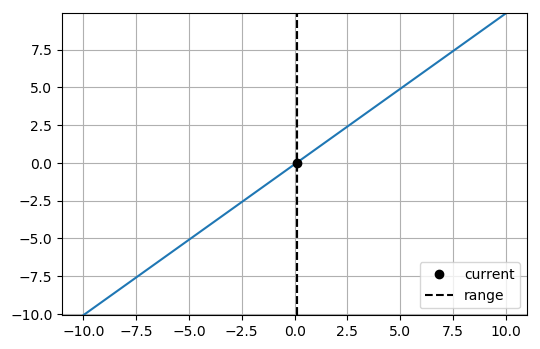

In [58]:
def plot_bisection(f, a, b, xmin=-10, xmax=10, xn=100):
    
    # a. find root and return all information 
    m, max_iter, a, b, fm = bisection(f, a, b, full_info=True)
    
    # b. compute function on grid
    xvec = np.linspace(xmin, xmax, xn)
    fxvec = f(xvec)
    
    # c. figure
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
        
    ax.plot(xvec,fxvec) # on grid
    ax.plot(m[i],fm[i],'o',color='black',label='current') # mid
    ax.plot([a[i],b[i]],[fm[i],fm[i]],'--',color='black',label='range') # range
    ax.axvline(a[i],ls='--',color='black')
    ax.axvline(b[i],ls='--',color='black')        
        
    ax.legend(loc='lower right')
    ax.grid(True)
    ax.set_ylim([fxvec[0],fxvec[-1]])
    

plot_bisection(f, -10, 10)